#**A. Đọc dữ liệu**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/DS102.N21_Học máy thống kê/Data/ho chi minh 2020-08-15 to 2023-05-05.csv')
data.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,993.000000,994.000000,994.000000,994.000000,994.000000,994.000000,481.000000,994.000000
mean,32.798692,24.918712,28.181489,37.969316,25.498793,31.157445,23.367404,77.069517,4.892052,70.523139,...,18.752515,181.137123,1008.930514,57.189235,9.597686,209.651710,18.098994,7.573441,27.557173,0.482948
std,1.737156,1.542677,1.325746,3.275696,2.740300,2.889915,2.249212,9.203578,11.247494,45.616820,...,5.488426,84.905380,1.955082,12.600427,0.681140,59.482476,5.144355,1.951873,18.998612,0.289428
min,27.000000,18.000000,23.400000,28.300000,18.000000,23.500000,15.000000,53.100000,0.000000,0.000000,...,7.600000,0.200000,1002.900000,19.400000,7.000000,15.000000,1.300000,1.000000,10.000000,0.000000
25%,32.000000,24.000000,27.300000,35.700000,24.000000,29.200000,22.200000,70.600000,0.000000,0.000000,...,14.800000,122.750000,1007.600000,49.025000,9.200000,167.725000,14.400000,6.000000,10.000000,0.250000
50%,33.000000,25.000000,28.100000,38.450000,25.000000,30.900000,24.300000,77.900000,0.600000,100.000000,...,18.400000,170.100000,1008.800000,56.600000,9.800000,214.100000,18.500000,8.000000,30.000000,0.480000
75%,34.000000,26.000000,29.100000,40.600000,26.000000,32.900000,25.000000,84.200000,4.200000,100.000000,...,21.600000,252.475000,1010.100000,65.100000,10.100000,253.875000,21.900000,9.000000,30.000000,0.747500
max,37.000000,29.000000,32.000000,48.700000,37.900000,41.200000,27.500000,98.200000,109.000000,100.000000,...,50.000000,359.700000,1015.400000,99.700000,12.800000,321.100000,27.800000,10.000000,75.000000,0.980000


**Thuộc tính dữ liệu:**
- 994 điểm dữ liệu
- 24 thuộc tính
- Thuộc tính nhiệt độ trung bình (temp) không chứa giá trị rỗng
> Lấy thuộc tính temp(nhiệt độ trung bình) cho bài toán.

##**Trực quan hóa bằng biểu đồ**

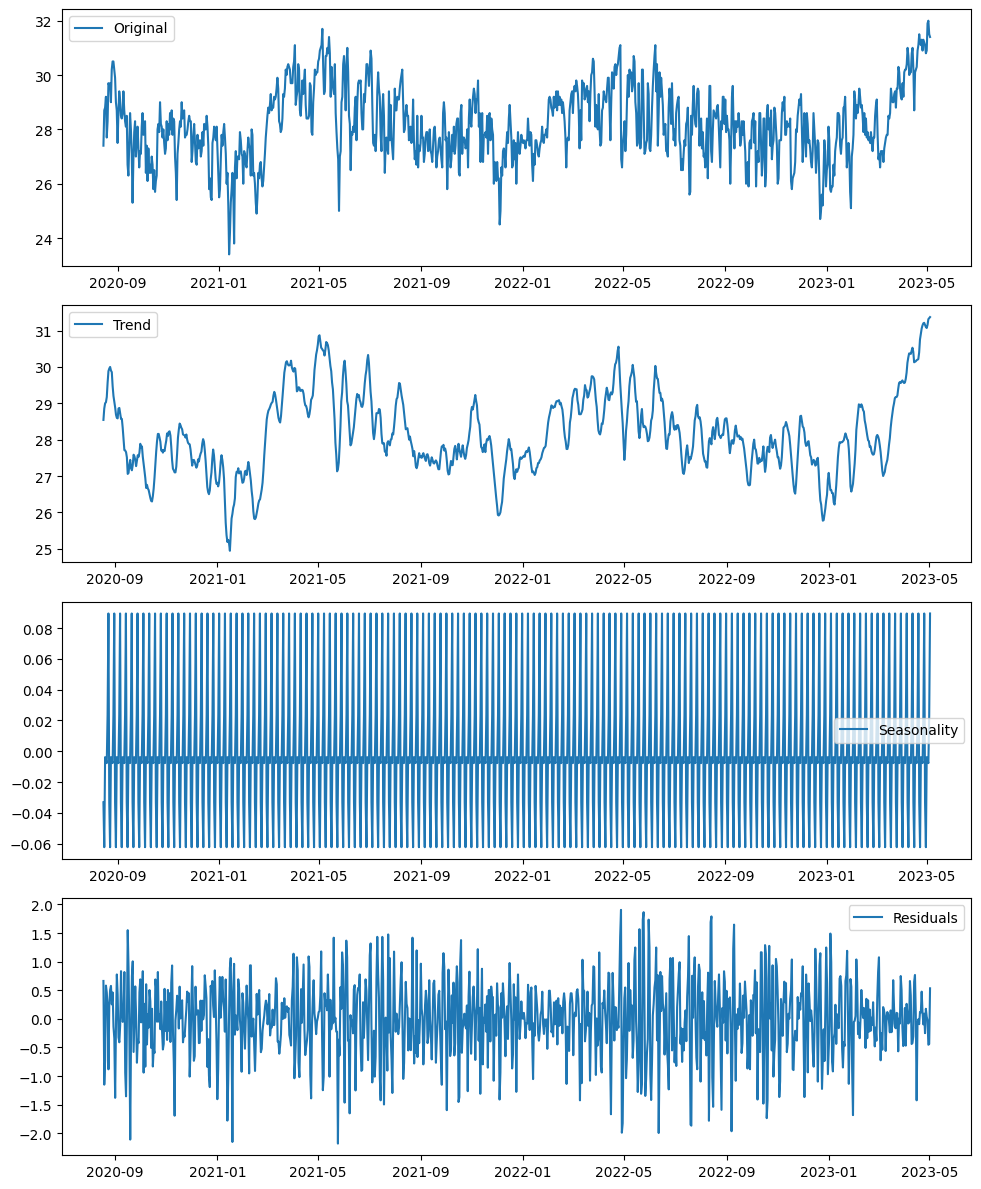

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)
result = seasonal_decompose(data['temp'], model='additive')

fig, axes = plt.subplots(4, 1, figsize=(10, 12))
axes[0].plot(data.index, data['temp'], label='Original')
axes[0].legend()
axes[1].plot(data.index, result.trend, label='Trend')
axes[1].legend()
axes[2].plot(data.index, result.seasonal, label='Seasonality')
axes[2].legend()
axes[3].plot(data.index, result.resid, label='Residuals')
axes[3].legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='datetime'>

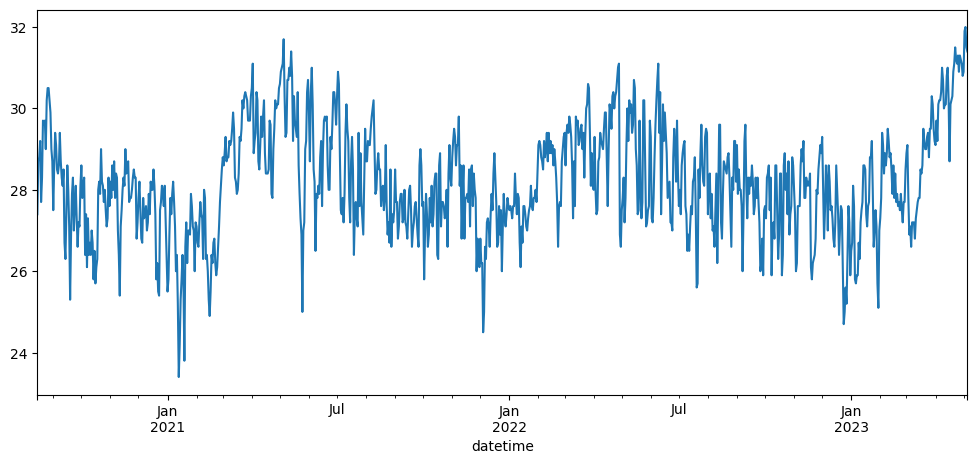

In [29]:
data = data['temp']
data.plot(figsize=(12,5))

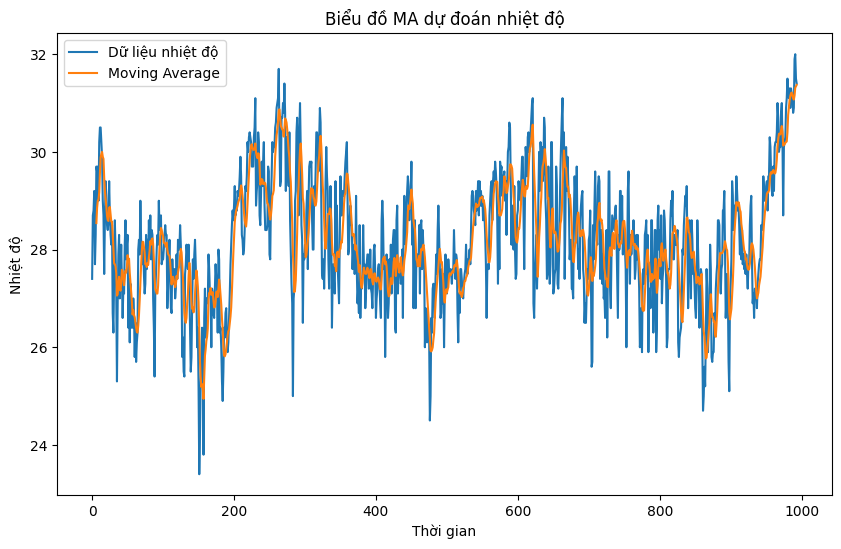

In [11]:
window_size = 7

ma = data.rolling(window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Dữ liệu nhiệt độ')
plt.plot(data.index, ma, label='Moving Average')
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ')
plt.title('Biểu đồ MA dự đoán nhiệt độ')
plt.legend()
plt.show()

**Nhận xét:**
- Với mỗi điểm dữ liệu đại diện cho một ngày, ta thấy, dữ liệu có dạng sóng tính chất theo chu kỳ - ở đây là theo mùa vụ và có chu kỳ với tần suất không cố định.
- Biểu đồ nhiệt độ có thể hiển thị xu hướng tăng, giảm hoặc ổn định trong quá trình thay đổi nhiệt độ theo thời gian.

**Time-Series:**
Sử dụng mô hình chuỗi thời gian để dự đoán nhiệt độ dựa vào các yếu tố sau:
- Tính chu kỳ và mẫu trong dữ liệu: Mô hình chuỗi thời gian có khả năng mô phỏng và dự đoán các chu kỳ, mẫu của dữ liệu giúp chúng ta hiểu được xu hướng và biểu đồ của nhiệt độ theo thời gian.
- Xử lý các yếu tố thời gian: Mô hình chuỗi thời gian cho phép chúng ta xử lý các yếu tố thời gian như trend (xu hướng), seasonal (mùa vụ), và residual (phần còn lại). Việc phân tích và loại bỏ các yếu tố này khỏi dữ liệu giúp tạo ra dự đoán nhiệt độ chính xác hơn.
- Xử lý dữ liệu không đồng nhất: Dữ liệu nhiệt độ thường có thể bị thiếu, bị nhiễu hoặc không đồng nhất. Mô hình chuỗi thời gian có thể xử lý các giá trị bị thiếu thông qua các kỹ thuật như nội suy hoặc điền giá trị trung bình. Ngoài ra, mô hình cũng có khả năng giảm thiểu nhiễu và biến đổi dữ liệu không đồng nhất để tạo ra dự đoán nhiệt độ chính xác hơn.
- Dự đoán tương lai: Mô hình chuỗi thời gian cho phép chúng ta dự đoán giá trị nhiệt độ trong tương lai dựa trên các mẫu và xu hướng trong dữ liệu lịch sử. Điều này giúp chúng ta đưa ra các quyết định dựa trên dự đoán nhiệt độ trong tương lai, ví dụ như quản lý năng lượng, lập kế hoạch sản xuất nông nghiệp hoặc dự báo thời tiết.
> Tuy nhiên, để đảm bảo độ chính xác và hiệu quả của dự đoán, cần áp dụng các kỹ thuật và phương pháp phù hợp trong mô hình chuỗi thời gian, cũng như đánh giá và điều chỉnh mô hình dựa trên kết quả dự đoán và đánh giá sai số.

##**Chia dữ liệu thành tập train và test**

In [4]:
train=data.iloc[:700]
test=data.iloc[700:]

#**B. TIME-SERIES - CÀI ĐẶT MÔ HÌNH CHUỖI THỜI GIAN**


##**1. SARIMA(Seasonal AutoRegressive Integrated Moving Average)**


SARIMA (Seasonal AutoRegressive Integrated Moving Average) là mô hình trong phân tích chuỗi thời gian, được sử dụng để dự đoán và mô hình hóa sự biến đổi của dữ liệu theo thời gian. Nó kết hợp các thành phần tự hồi quy (AR), tự sai phân (I) và trung bình trượt (MA), và cũng có khả năng xử lý các yếu tố mùa vụ trong dữ liệu. SARIMA là một lựa chọn phổ biến cho dự đoán trong các loại dữ liệu có xu hướng và yếu tố mùa vụ.

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima
import warnings
#Bỏ qua các cảnh báo vô hại
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

###Kiểm tra tính ổn định của dữ liệu(Check For Stationarity)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(data)

1. ADF :  -4.673428115707257
2. P-Value :  9.437583649893611e-05
3. Critical Values :
	 1% :  -3.4370062675076807
	 5% :  -2.8644787205542492
	 10% :  -2.568334722615888


Bảng ADF (Augmented Dickey-Fuller) là kết quả của kiểm định ADF được sử dụng để kiểm tra tính không đổi của chuỗi thời gian. Dưới đây là giải thích cho các giá trị trong bảng:

ADF: Đây là giá trị của thống kê ADF. Nếu giá trị ADF nhỏ hơn các giá trị ngưỡng (critical values), ta có thể bác bỏ giả thuyết không đổi và kết luận rằng chuỗi thời gian không có tính không đổi. Trong trường hợp này, giá trị ADF là -4.673428115707257.

P-Value: Đây là giá trị p-value của kiểm định ADF. Nếu giá trị p-value nhỏ hơn một ngưỡng xác định (thường là 0.05), ta có thể bác bỏ giả thuyết không đổi. Trong trường hợp này, giá trị p-value là 9.437583649893611e-05, nhỏ hơn ngưỡng 0.05, cho thấy có đủ bằng chứng để bác bỏ giả thuyết không đổi.

Critical Values: Đây là các giá trị ngưỡng cho kiểm định ADF tại các mức ý nghĩa (confidence levels) khác nhau. Trong trường hợp này, có ba giá trị ngưỡng được cung cấp: 1%, 5%, và 10%. Giá trị ADF phải nhỏ hơn các giá trị ngưỡng tương ứng để có thể bác bỏ giả thuyết không đổi. Trong trường hợp này, giá trị ADF là -4.673428115707257, thấp hơn cả ba giá trị ngưỡng (-3.4370062675076807, -2.8644787205542492, -2.568334722615888), cho thấy có đủ bằng chứng để bác bỏ giả thuyết không đổi.

Tổng quan, kết quả kiểm định ADF cho thấy chuỗi thời gian không có tính không đổi, và có xu hướng có sự tăng hoặc giảm theo thời gian. Điều này có thể yêu cầu thực hiện sai phân hoặc biến đổi khác để đạt được tính không đổi trước khi sử dụng mô hình SARIMA.

In [ ]:
# Thực hiện sai phân
diff_data = data.diff().dropna()  # Thực hiện sai phân bậc 1 và loại bỏ các giá trị NaN

# Kiểm tra tính không đổi sử dụng kiểm định ADF
adf_test(diff_data)

1. ADF :  -11.667376306901833
2. P-Value :  1.8700808837834576e-21
3. Critical Values :
	 1% :  -3.4370678095881804
	 5% :  -2.8645058608075264
	 10% :  -2.568349178354273


Trong kết quả của kiểm định Augmented Dickey-Fuller (ADF), chúng ta có các thông số sau:

ADF Statistic: -11.667376306901833

Giá trị thống kê từ kiểm định ADF. Giá trị này được sử dụng để so sánh với các giá trị Critical Values để đưa ra kết luận về tính không đổi của dữ liệu.
Trong trường hợp này, giá trị ADF Statistic là -11.667376306901833.
p-value: 1.8700808837834576e-21

Giá trị p-value từ kiểm định ADF. Giá trị này được sử dụng để đánh giá tính không đổi của dữ liệu sau khi thực hiện sai phân.
Trong trường hợp này, giá trị p-value là 1.8700808837834576e-21, rất nhỏ hơn mức ý nghĩa thường được chọn (ví dụ: 0.05). Điều này cho thấy dữ liệu đã đạt được tính không đổi sau khi thực hiện sai phân.
Critical Values:

Các giá trị Critical Values ở các mức ý nghĩa khác nhau (thường là 1%, 5%, 10%). Các giá trị này được sử dụng để so sánh với ADF Statistic để đưa ra kết luận về tính không đổi của dữ liệu.
Trong trường hợp này, giá trị Critical Values ở mức ý nghĩa 1% là -3.4370678095881804, ở mức ý nghĩa 5% là -2.8645058608075264, và ở mức ý nghĩa 10% là -2.568349178354273.

Vì giá trị ADF Statistic (-11.667376306901833) nhỏ hơn các giá trị Critical Values, chúng ta có thể kết luận rằng dữ liệu đã đạt được tính không đổi sau khi thực hiện sai phân.
Tóm lại, kết quả của kiểm định ADF cho thấy dữ liệu đã đạt được tính không đổi sau khi thực hiện sai phân, do giá trị p-value rất nhỏ và ADF Statistic nhỏ hơn các giá trị Critical Values.

##**2. Tìm bộ tham số tối ưu**

In [ ]:
stepwise_fit = auto_arima(diff_data,
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  993
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -1159.385
Date:                Mon, 19 Jun 2023   AIC                           2326.770
Time:                        17:59:28   BIC                           2346.373
Sample:                             0   HQIC                          2334.223
                                - 993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5429      0.056      9.690      0.000       0.433       0.653
ma.L1         -0.7977      0.060    -13.400      0.000      -0.914      -0.681
ma.L2         -0.1096      0.046     -2.405      0.016      -0.199      -0.020
sigma2         0.6044      0.024     25.222      0.000       0.557       0.651
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.18
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.53
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###Chọn bộ tham số tối ưu

In [ ]:
#Tạo các giá trị khả thi cho các tham số p, d, q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

#Biến số mùa vụ dựa vào tổ hợp của bộ tham số pdq và tham số thời gian 12
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
warnings.filterwarnings("ignore")

AIC = []
parm_ = []
parm_s = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(diff_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            AIC.append(results.aic)
            parm_.append(param)
            parm_s.append(param_seasonal)

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
min(AIC)
pos = AIC.index(min(AIC))
parm_[pos]
parm_s[pos]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2456.65854248803
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2430.373511043803
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2405.810239572507
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3135.743118342367
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2435.7055951555612
SARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2406.366601528513
SARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:4169.458018794641
SARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:3121.567227030091
SARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2469.8425839182737
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2432.0725258441084
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2432.2082054281077
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:2405.998884510657
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2823.503938911243
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2441.127165189229
SARIMA(0, 0, 0)x

(0, 0, 2, 12)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=parm_[pos],
                                seasonal_order=parm_s[pos],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])
print(results.summary())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0001      0.000   2736.774      0.000       0.999       1.001
ma.L1         -0.2906      0.029     -9.881      0.000      -0.348      -0.233
ma.L2         -0.3106      0.030    -10.398      0.000      -0.369      -0.252
ma.S.L12      -0.0409      0.030     -1.342      0.180      -0.101       0.019
ma.S.L24      -0.0171      0.032     -0.529      0.597      -0.080       0.046
sigma2         0.6325      0.026     23.877      0.000       0.581       0.684
                                     SARIMAX Results                                      
Dep. Variable:                               temp   No. Observations:                  994
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1150.782
Date:                            Thu, 15 Jun 2023   AIC                           2313.564
Time

**Bộ tham số tối ưu:** SARIMAX(1, 0, 2)x(0, 0, 2, 12)

##**3. Huấn luyện mô hình**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(1,0,2), seasonal_order=(0,0,2,12))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               temp   No. Observations:                  994
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1185.340
Date:                            Mon, 19 Jun 2023   AIC                           2382.681
Time:                                    17:59:29   BIC                           2412.091
Sample:                                         0   HQIC                          2393.862
                                            - 994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.37e-05   4.22e+04      0.000       1.000       1.000
ma.L1         -0.2873      0.029     -9.929      0.000      -0.344      -0.231
ma.L2         -0.3057      0.030    -10.358      0.000      -0.364      -0.248
ma.S.L12      -0.0347      0.030     -1.166      0.244      -0.093       0.024
ma.S.L24      -0.0257      0.032     -0.809      0.419      -0.088       0.037
sigma2         0.6298      0.025     25.631      0.000       0.582       0.678
===================================================================================
Ljung-Box (L1) (Q):                   2.83   Jarque-Bera (JB):                65.31
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.49
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##**4.Dự đoán trên tập test**

### **Biểu đồ dự đoán**

<Axes: >

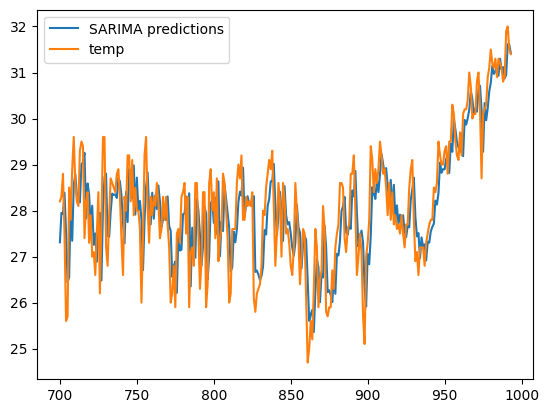

In [ ]:
start=len(train)
end=len(train) + len(test)- 1
pred=model.predict(start=start,end=end,typ='levels').rename('SARIMA predictions')
pred.plot(legend=True)
test.plot(legend=True)

### **Sai số sử dụng thang đo RMSE, R-squared**

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

r2 = r2_score(test, pred)
rmse=sqrt(mean_squared_error(test,pred))

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 0.7797564443136074
R-squared: 0.6769902308222515
